###Data Preparation


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import dataset
data = pd.read_csv("Titanic-Dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# find null values
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#convert categorical data to numerical
data.replace({"male": 1, "female": 2}, inplace=True)

In [ ]:
#remove unnecessary columns
data.drop(["Cabin","Parch","Embarked","PassengerId","Name", "Ticket", "Fare", "SibSp"],axis=1, inplace=True)

In [ ]:
data

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,2,38.0
2,1,3,2,26.0
3,1,1,2,35.0
4,0,3,1,35.0
...,...,...,...,...
886,0,2,1,27.0
887,1,1,2,19.0
888,0,3,2,NaN
889,1,1,1,26.0


In [ ]:
data.Age.mode()

,Age
0,24.0


In [ ]:
# filling null values
data.Age.fillna(24.0, inplace=True)

In [ ]:
data

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,2,38.0
2,1,3,2,26.0
3,1,1,2,35.0
4,0,3,1,35.0
...,...,...,...,...
886,0,2,1,27.0
887,1,1,2,19.0
888,0,3,2,24.0
889,1,1,1,26.0


In [ ]:
# dividing independent and dependent variables
x = data.drop("Survived", axis=1)
y = data['Survived']

In [ ]:
# splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
# using sklearn.linear_model.Perceptron()
model = Perceptron()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(accuracy_score(y_test, y_predict))

0.6753731343283582


###Single Perceptron Implementation:
#### o Write a Python script to implement a single perceptron for binary classification.
#### o Include functions for initializing weights and bias, calculating the weighted sum, applying activation function (e.g., step function), and updating weights.
#### o Test the perceptron on a simple binary classification problem.
#### o Evaluate the model's performance on the testing set using appropriate metrics (accuracy, precision, recall).


## Perceptron model for Titanic dataset

In [ ]:
# Defining perceptron class
class Perceptron2:
    def __init__(self, learning_rate, epochs):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, z):
        return np.heaviside(z,0) #returns 1 if >=0 and 0 if < 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            for i in range(n_samples):
                z = np.dot(X.iloc[i], self.weights) + self.bias
                y_pred = self.activation(z)

                # Update weights and bias
                self.weights += self.learning_rate*(y.iloc[i]-y_pred)*X.iloc[i]
                self.bias += self.learning_rate*(y.iloc[i]-y_pred)

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

In [ ]:
# using Perceptron2 class
perceptron = Perceptron2(0.001, 10) #creating an object of class

perceptron.fit(X_train, y_train)
pred = perceptron.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.6343283582089553


In [ ]:
print(pred)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.99      0.76       157
           1       0.93      0.13      0.22       111

    accuracy                           0.63       268
   macro avg       0.77      0.56      0.49       268
weighted avg       0.75      0.63      0.54       268



###Hyperparameter Tuning with GridSearchCV:
#### o Define a grid of hyperparameters for the perceptron (e.g., learning rate, number of epochs, activation function).
#### o Use GridSearchCV to find the best combination of hyperparameters.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0], 'max_iter': [10, 50, 100, 200, 500]}

In [ ]:
grid_search = GridSearchCV(Perceptron(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Perceptron(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_iter': [10, 50, 100, 200, 500]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'alpha': 0.0001, 'max_iter': 50}


In [ ]:
best_perceptron = Perceptron2(learning_rate=best_params['alpha'], epochs=best_params['max_iter'])
best_perceptron.fit(X_train, y_train)
y_pred = best_perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7761194029850746


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.96      0.83       157
           1       0.90      0.51      0.66       111

    accuracy                           0.78       268
   macro avg       0.82      0.74      0.74       268
weighted avg       0.81      0.78      0.76       268



In [ ]:
model = Perceptron(alpha=0.0001, max_iter=50)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6753731343283582


In [ ]:
report = classification_report(y_test, y_pred2)
print(report)

              precision    recall  f1-score   support

           0       0.65      0.98      0.78       157
           1       0.90      0.24      0.38       111

    accuracy                           0.68       268
   macro avg       0.77      0.61      0.58       268
weighted avg       0.75      0.68      0.62       268



### **Assignment:**
#### Implement a single perceptron for the Iris dataset and utilize GridSearchCV for hyperparameter tuning.

In [ ]:
# importing iris dataset
data = pd.read_csv("/content/Iris (1).csv")

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


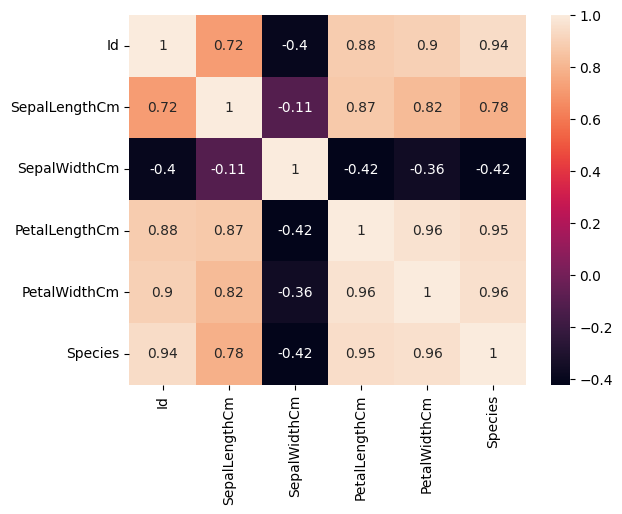

In [ ]:
# finding correlation
# Convert 'Species' column to numerical before calculating correlation
data['Species'] = data['Species'].astype('category').cat.codes

heatmap = sns.heatmap(data.corr(), annot=True)

In [ ]:
# removing unnecessary columns
data.drop(["Id","SepalWidthCm"], axis=1, inplace=True)

In [ ]:
# converting categorical data to numerical
data.Species.replace({"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3}, inplace=True)

In [ ]:
data

,SepalLengthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0
...,...,...,...,...
145,6.7,5.2,2.3,2
146,6.3,5.0,1.9,2
147,6.5,5.2,2.0,2
148,6.2,5.4,2.3,2


In [ ]:
# dividing independent and dependent variables
df = data.drop("Species", axis=1)
target = data.Species

In [ ]:
target

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
# splitting dataset into training and testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(df, target, test_size=0.3, random_state=42)

In [ ]:
# using Perceptron2 class model
perceptron = Perceptron2(0.1, 20)
perceptron.fit(X_train2, y_train2)
pred = perceptron.predict(X_test2)

In [ ]:
print(accuracy_score(y_test2, pred))

0.28888888888888886


In [ ]:
report = classification_report(y_test2, pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.29      1.00      0.45        13
           2       0.00      0.00      0.00        13

    accuracy                           0.29        45
   macro avg       0.10      0.33      0.15        45
weighted avg       0.08      0.29      0.13        45



#### Hyperparameter Tuning

In [ ]:
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0], 'max_iter': [10, 50, 100, 200, 500]}

In [ ]:
# using GridSearchCV() to find the best hyperparameters
grid_search = GridSearchCV(Perceptron(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=Perceptron(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_iter': [10, 50, 100, 200, 500]},
             scoring='accuracy')

In [ ]:
# best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'alpha': 0.0001, 'max_iter': 10}


In [ ]:
best_perceptron = Perceptron2(learning_rate=best_params['alpha'], epochs=best_params['max_iter'])
best_perceptron.fit(X_train2, y_train2)
y_pred = best_perceptron.predict(X_test2)

In [ ]:
accuracy = accuracy_score(y_test2, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.28888888888888886


In [ ]:
report = classification_report(y_test2, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.29      1.00      0.45        13
           2       0.00      0.00      0.00        13

    accuracy                           0.29        45
   macro avg       0.10      0.33      0.15        45
weighted avg       0.08      0.29      0.13        45



In [ ]:
model = Perceptron(alpha=0.0001, max_iter=10)
model.fit(X_train2, y_train2)
y_pred = model.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7111111111111111


In [ ]:
report = classification_report(y_test2, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.00      0.00      0.00        13
           2       0.50      1.00      0.67        13

    accuracy                           0.71        45
   macro avg       0.50      0.67      0.56        45
weighted avg       0.57      0.71      0.61        45



#**CONCLUSION:**

The single perceptron was successfully implemented for binary classification on the Titanic and Iris datasets. The model was tested using key performance metrics such as accuracy, precision, and recall. Hyperparameter tuning with GridSearchCV improved performance by optimizing learning rate and epochs. The results highlight the perceptron’s effectiveness for linearly separable data while demonstrating its limitations for complex patterns.